In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math
import h5py
import warnings
from torch.functional import F
from pathlib import Path
rng = np.random.default_rng(1)
warnings.filterwarnings('ignore')
from abbasilab_v1dd import ARTIFACT_DIR
from scipy import stats
from abbasilab_v1dd.locally_sparse_noise.rf_utils import find_rf_center_v2
from allen_v1dd.client import OPhysClient
from allen_v1dd.stimulus_analysis import LocallySparseNoise
from abbasilab_v1dd.locally_sparse_noise.rf_utils import *
import statsmodels.stats.multicomp as multi


In [4]:
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]

In [5]:
# H5_DIR = Path(f"{ARTIFACT_DIR}/lsn_metrics_240126.h5") this was used in my previous code, check if the same with new
H5_DIR = Path(f"{ARTIFACT_DIR}/lsn_ns_metrics_240404.h5")
f_events = h5py.File(H5_DIR,'r')

In [6]:
mouse_id = 'M427836'
col_vol_str = '23'
plane_name = f"Plane_1"
plane = 2 # there is a mismatch in plane numbers in h5 and client (0-6 vs. 1-5)

In [7]:
f_events[mouse_id][col_vol_str].keys()

<KeysViewHDF5 ['Plane_0', 'Plane_1', 'Plane_2', 'Plane_3', 'Plane_4', 'Plane_5']>

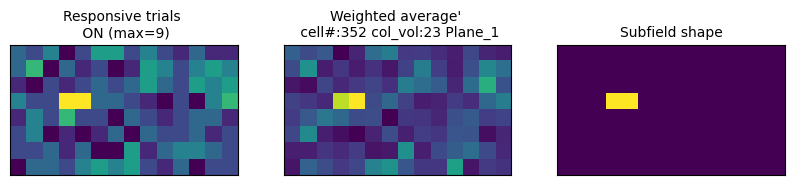

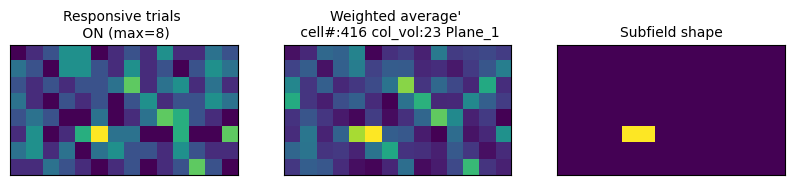

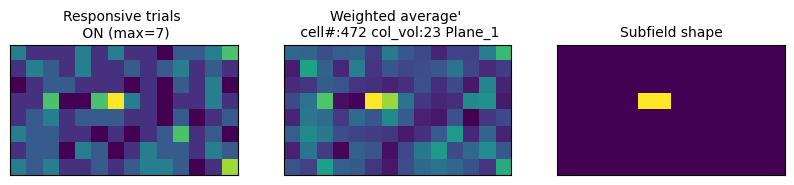

In [8]:
for cell in [352, 416, 472]:

    plane_info_events = f_events[mouse_id][col_vol_str][plane_name]
    n_responsive_trials_on_events = plane_info_events['n_responsive_trials_on']
    n_responsive_trials_off_events = plane_info_events['n_responsive_trials_off']
    responsiveness_score_on_events = plane_info_events['max_n_responsive_trials_on']
    responsiveness_score_off_events = plane_info_events['max_n_responsive_trials_off']
    p_values_events = plane_info_events['p_values']
    sig_on_frames_events = plane_info_events['sig_on_frames']
    sig_off_frames_events = plane_info_events['sig_off_frames']
    max_wavg_on_frames_events = plane_info_events['max_wavg_on_frames']
    max_wavg_off_frames_events = plane_info_events['max_wavg_off_frames']
    lsn_values_events = plane_info_events['lsn_values']
    mu_spont_events = plane_info_events['mu_spont']
    max_spont_events = plane_info_events['max_spont']
    min_spont_events = plane_info_events['min_spont']
    weighted_avg_on_events = plane_info_events['weighted_avg_on']
    weighted_avg_off_events = plane_info_events['weighted_avg_off']
    z_score_mat_on_events = plane_info_events['z_score_mat_on']
    z_score_mat_off_events = plane_info_events['z_score_mat_off']
    is_responsive_events = plane_info_events['is_responsive']
    is_responsive_to_on_events = plane_info_events['is_responsive_to_on']
    is_responsive_to_off_events = plane_info_events['is_responsive_to_off']
    has_on_rf = plane_info_events['has_rf_v2_on']
    has_off_rf = plane_info_events['has_rf_v2_off']

    n_cells = z_score_mat_on_events.shape[0]
    z_score_mat_on_thresholded_events = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_on_thresholded_events[icell, :, :] = z_score_mat_on_events[icell, :, :] > 2.5

    n_cells = z_score_mat_off_events.shape[0]
    z_score_mat_off_thresholded_events = np.zeros((n_cells, 8, 14))
    z_score_mat_off_thresholded_dff = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_off_thresholded_events[icell, :, :] = z_score_mat_off_events[icell, :, :] > 2.5
        
    data = z_score_mat_on_events[cell, :, :]
    # print(f"cell#:{cell} col_vol:{col_vol_str} {plane_name}")
    data1 = data > 2.5
    x_initial, y_initial, gauss_input = find_rf_center_v2(n_responsive_trials_on_events[cell, :], weighted_avg_on_events[cell, :])
    # print(f"Gaussian was initialized with x={y_initial} and y={x_initial}")
    h_initial = gauss_input.max()
    rf_center = np.zeros_like(gauss_input)
    rf_center[x_initial, y_initial] = data1[x_initial, y_initial]
    has_rf = has_on_rf[cell]

    if has_rf:
        fig = plt.figure(figsize = (10, 5))
        font_size = 10

        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(n_responsive_trials_on_events[cell, :, :])
        ax1.set_title(f'Responsive trials \n ON (max={n_responsive_trials_on_events[cell, :, :].max()})', fontsize = 10)
        ax1.set_xticks([])
        ax1.set_yticks([])

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(weighted_avg_on_events[cell, :, :])
        ax2.set_title(f"Weighted average' \n cell#:{cell} col_vol:{col_vol_str} {plane_name}" , fontsize = font_size)
        ax2.set_xticks([])
        ax2.set_yticks([])

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(gauss_input)
        ax3.set_title('Subfield shape', fontsize = font_size)
        ax3.set_xticks([])
        ax3.set_yticks([])


In [19]:
n_cells

542

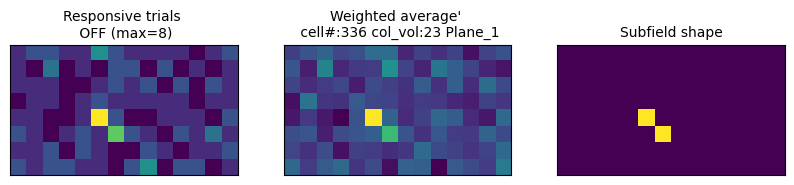

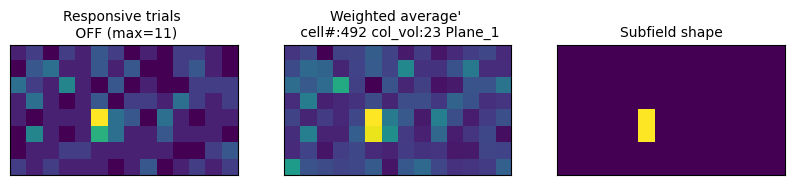

In [7]:
for cell in [336, 492]:
    plane_info_events = f_events[mouse_id][col_vol_str][plane_name]
    n_responsive_trials_on_events = plane_info_events['n_responsive_trials_on']
    n_responsive_trials_off_events = plane_info_events['n_responsive_trials_off']
    responsiveness_score_on_events = plane_info_events['max_n_responsive_trials_on']
    responsiveness_score_off_events = plane_info_events['max_n_responsive_trials_off']
    p_values_events = plane_info_events['p_values']
    sig_on_frames_events = plane_info_events['sig_on_frames']
    sig_off_frames_events = plane_info_events['sig_off_frames']
    max_wavg_on_frames_events = plane_info_events['max_wavg_on_frames']
    max_wavg_off_frames_events = plane_info_events['max_wavg_off_frames']
    lsn_values_events = plane_info_events['lsn_values']
    mu_spont_events = plane_info_events['mu_spont']
    max_spont_events = plane_info_events['max_spont']
    min_spont_events = plane_info_events['min_spont']
    weighted_avg_on_events = plane_info_events['weighted_avg_on']
    weighted_avg_off_events = plane_info_events['weighted_avg_off']
    z_score_mat_on_events = plane_info_events['z_score_mat_on']
    z_score_mat_off_events = plane_info_events['z_score_mat_off']
    is_responsive_events = plane_info_events['is_responsive']
    is_responsive_to_on_events = plane_info_events['is_responsive_to_on']
    is_responsive_to_off_events = plane_info_events['is_responsive_to_off']
    has_on_rf = plane_info_events['has_rf_v2_on']
    has_off_rf = plane_info_events['has_rf_v2_off']

    n_cells = z_score_mat_on_events.shape[0]
    z_score_mat_on_thresholded_events = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_on_thresholded_events[icell, :, :] = z_score_mat_on_events[icell, :, :] > 2.5

    n_cells = z_score_mat_off_events.shape[0]
    z_score_mat_off_thresholded_events = np.zeros((n_cells, 8, 14))
    z_score_mat_off_thresholded_dff = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_off_thresholded_events[icell, :, :] = z_score_mat_off_events[icell, :, :] > 2.5
        
    data = z_score_mat_off_events[cell, :, :]
    # print(f"cell#:{cell} col_vol:{col_vol_str} {plane_name}")
    data1 = data > 2.5
    x_initial, y_initial, gauss_input = find_rf_center_v2(n_responsive_trials_off_events[cell, :], weighted_avg_off_events[cell, :])
    # print(f"Gaussian was initialized with x={y_initial} and y={x_initial}")
    h_initial = gauss_input.max()
    rf_center = np.zeros_like(gauss_input)
    rf_center[x_initial, y_initial] = data1[x_initial, y_initial]
    has_rf = has_off_rf[cell]

    if has_rf:
        fig = plt.figure(figsize = (10, 5))
        font_size = 10

        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(n_responsive_trials_off_events[cell, :, :])
        ax1.set_title(f'Responsive trials \n OFF (max={n_responsive_trials_off_events[cell, :, :].max()})', fontsize = 10)
        ax1.set_xticks([])
        ax1.set_yticks([])

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(weighted_avg_off_events[cell, :, :])
        ax2.set_title(f"Weighted average' \n cell#:{cell} col_vol:{col_vol_str} {plane_name}" , fontsize = font_size)
        ax2.set_xticks([])
        ax2.set_yticks([])

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(gauss_input)
        ax3.set_title('Subfield shape', fontsize = font_size)
        ax3.set_xticks([])
        ax3.set_yticks([])


### Plot mean timetraces

In [8]:
plane=2

In [9]:
DATA_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/")
assert DATA_DIR.exists()
DATA_DIR.resolve()
client =  OPhysClient(DATA_DIR)
session = client.load_ophys_session(f"{mouse_id}_{col_vol_str}")
lsn = LocallySparseNoise(session, plane, trace_type = "events")

traces = session.get_traces(plane, trace_type="dff")
dff = traces.values   
valid_dff = dff[lsn.is_roi_valid, :]

event_traces = session.get_traces(plane, trace_type="events")
event = event_traces.values
# valid_event = event[dg.is_roi_valid, :]

In [10]:
valid_dff.shape

(542, 21490)

In [11]:
sample_rate_hz = 6
cond_duration = 1
time_before = -1#0.5
time_after = 2#0.5
time_after_margin = 1
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 1705
n_cells = valid_dff.shape[0]
n_time_points = 12

dff_trials = np.zeros((n_cells, n_time_points, n_trials))
trial_count = 0
for trial in range(n_trials):   
    trial_start = lsn.stim_table.start[trial]+time_before
    trial_end = lsn.stim_table.end[trial]+time_after
    time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
    trial_dff = valid_dff[:, time_mask]
    dff_trials[:, :, trial] = trial_dff[:, :12]
    
dff_trials.shape

(542, 12, 1705)

In [30]:

s1, s2 = 8, 14
response_thresh_alpha = 0.05
nstd = 3
onset_delay = -1
offset_delay = 2
sample_spontaneous = 1000
if session is None:
    raise ValueError('Session not found')

all_lsn_vals_in_colvol_plane, all_pvals_in_colvol_plane, cell_indices  = calc_lsn_p_vals_for_col_vol_plane(session,
                                    plane,
                                    sample_spontaneous,
                                    onset_delay,
                                    offset_delay)

design_matrix, trial_template, frame_images = get_plane_lsn_constants(session)
all_x = []
all_y = []
all_depths = []
all_planes = []
all_columns = []
all_volumes = []
all2p3ps = []


lsn = LocallySparseNoise(session, plane, trace_type = "events")

for icell in range(lsn.n_rois_valid):
    roi_mask = session.get_roi_image_mask(plane, icell)
    y1, x1 = np.mean(np.where(roi_mask), axis=1, dtype=int)
    depth = session.get_plane_depth(plane)
    all_x.append(x1)
    all_y.append(y1)
    all_depths.append(depth)
    all_planes.append(plane)
    all_columns.append(session.column_id)
    all_volumes.append(session.volume_id)
    all2p3ps.append(int(session.scope_type[0]))

all_x = np.array(all_x)
all_y = np.array(all_y)    
all_depths = np.array(all_depths)
all_planes = np.array(all_planes)
all_columns = np.array(all_columns)
all_volumes = np.array(all_volumes)
all2p3ps = np.array(all2p3ps)

rf_metrics = {
    "mouse_id": mouse_id,
    "column": session.column_id,            
    "volume": session.volume_id,
    "col_vol": col_vol_str,
    "plane": plane,
    "data": {}
}

if lsn.n_rois_valid > 1:
    n_valid_cells_in_colvol_plane = lsn.n_rois_valid # all_pvals_in_colvol_plane.shape[1]
    n_trials = all_pvals_in_colvol_plane.shape[0]
    
    # initialization
    
    valid_cell_index = np.zeros(n_valid_cells_in_colvol_plane, dtype = int) 
    on_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    percentage_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)

    number_of_pixels = int(design_matrix.shape[0]/2) # 112
    number_of_tot_pixels = int(design_matrix.shape[0]/2)*2 # 224
    total_on_off_trials = design_matrix.dot(np.ones(n_trials))

    s1, s2 = 8, 14
    
    lsn_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    p_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    is_trial_sig = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    total_responsive_trials_all_pixels = np.zeros(n_valid_cells_in_colvol_plane)
    n_responsive_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels), dtype = int)
    weighted_avg = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    weighted_avg_only_resp_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    is_responsive = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_chi2 = np.zeros(n_valid_cells_in_colvol_plane)
    chi2_mat_thresholded = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))

    n_responsive_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_on = np.zeros(n_valid_cells_in_colvol_plane)
    sig_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))    
    has_on_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    n_responsive_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_off = np.zeros(n_valid_cells_in_colvol_plane)
    sig_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    has_off_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    chi2_mat = chi_square_RFs(all_lsn_vals_in_colvol_plane, trial_template)
    mu_spont = np.mean(all_lsn_vals_in_colvol_plane, 0)
    max_spont = np.max(all_lsn_vals_in_colvol_plane, 0)
    min_spont = np.min(all_lsn_vals_in_colvol_plane, 0)
    
for cell in range(n_valid_cells_in_colvol_plane):
    valid_cell_index[cell] = cell
    lsn_values[cell, :] = all_lsn_vals_in_colvol_plane[:, cell] 
    p_values[cell, :] = all_pvals_in_colvol_plane[:, cell]
    is_trial_sig[cell, :] = all_pvals_in_colvol_plane[:, cell] < response_thresh_alpha
    total_responsive_trials_all_pixels[cell] = is_trial_sig[cell, :].sum() 

    n_responsive_trials[cell, :] = design_matrix.dot(is_trial_sig[cell, :]) # just average
    percentage_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]*100/is_trial_sig.shape[1]
    frac_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]/is_trial_sig.shape[1]

    weighted_avg[cell, :] = design_matrix.dot(all_lsn_vals_in_colvol_plane[:, cell]) # weighted average (based on responsiveness score)

    only_resp_trials_design_matrix = design_matrix[:, is_trial_sig[cell, :].astype(bool)]
    lsn_vals_only_resp_trials = all_lsn_vals_in_colvol_plane[is_trial_sig[cell, :].astype(bool), cell]
    weighted_avg_only_resp_trials[cell, :] = only_resp_trials_design_matrix.dot(lsn_vals_only_resp_trials) # weighted average only based on responsive trials (based on responsiveness score)

    is_responsive[cell] = is_cell_responsive(n_responsive_trials[cell, :], weighted_avg[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std[cell] = cell_has_rf(weighted_avg[cell, :], nstd = nstd)
    chi2_mat_thresholded[cell, :, :] = chi2_mat[cell, :, :] < 0.05

    has_rf_chi2[cell] = chi2_mat_thresholded[cell, :, :].sum().astype(bool)
    
    # on analysis
    # total_on_trials = total_on_off_trials[:number_of_pixels].sum()
    # n_resp_on_trials = n_responsive_trials[cell, :number_of_pixels].sum()
    # frac_res_to_on[cell] = n_resp_on_trials / total_on_trials

    n_responsive_trials_on[cell, :, :] = n_responsive_trials[cell, :number_of_pixels].reshape(s1, s2)
    total_on_trials = total_on_off_trials[:number_of_pixels].reshape(s1, s2)
    frac_res_to_on[cell] = (n_responsive_trials_on[cell, :, :] / total_on_trials).max()

    on_frame_idxs = np.multiply(design_matrix[n_responsive_trials_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    sig_on_frames[cell, on_frame_idxs] = 1

    on_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_on_frames[cell, on_wavg_frame_idxs] = 1

    weighted_avg_on[cell, :, :] = weighted_avg[cell, :number_of_pixels].reshape(s1, s2)
    weighted_avg_only_resp_trials_on[cell, :, :] = weighted_avg_only_resp_trials[cell, :number_of_pixels].reshape(s1, s2)
    max_n_responsive_trials_on[cell] = n_responsive_trials_on[cell, :].max()
    is_responsive_to_on[cell] = is_cell_responsive(n_responsive_trials_on[cell, :], weighted_avg_on[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_on [cell] = cell_has_rf(weighted_avg_on[cell, :], nstd = nstd)
    z_score_mat_on[cell, :, :], has_rf_zscore_on[cell] = rf_z_test(weighted_avg_on[cell, :])
    on_averaged_response_at_receptive_field[cell] = weighted_avg_on[cell, :, :].max()

    gauss_input = z_score_mat_on[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    on_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1]) #center_x, center_y, height, width_x, width_y)

    on_center_x[cell] = on_params[1]
    on_center_y[cell] = on_params[0]
    on_center_h[cell] = on_params[2]
    on_center_wx[cell] = on_params[4]*4
    on_center_wy[cell] = on_params[3]*4
    on_area[cell] = on_center_wx[cell] * on_center_wy[cell] * on_center_h[cell]
    has_on_rf [cell] = (on_center_wx[cell] < 5) and (on_center_wy[cell] < 5) and h_initial > 2.5

    # FIX ME: if wx or wy is > 4 means it did not converge. Find solution.
    
    # off analysis
    # total_off_trials = total_on_off_trials[number_of_pixels:].sum()
    # n_resp_off_trials = n_responsive_trials[cell, number_of_pixels:].sum()
    # frac_res_to_off[cell] = n_resp_off_trials / total_off_trials

    n_responsive_trials_off[cell, :, :] = n_responsive_trials[cell, number_of_pixels:].reshape(s1, s2)
    total_off_trials = total_on_off_trials[number_of_pixels:].reshape(s1, s2)
    frac_res_to_off[cell] = (n_responsive_trials_off[cell, :, :] / total_off_trials).max()

    off_frame_idxs = np.multiply(design_matrix[n_responsive_trials_off[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    sig_off_frames [cell, off_frame_idxs] = 1

    off_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_off_frames[cell, off_wavg_frame_idxs] = 1        

    weighted_avg_off[cell, :, :] = weighted_avg[cell, number_of_pixels:].reshape(s1, s2)
    weighted_avg_only_resp_trials_off[cell, :, :] = weighted_avg_only_resp_trials[cell, number_of_pixels:].reshape(s1, s2)  
    max_n_responsive_trials_off [cell] = n_responsive_trials_off[cell, :].max()
    is_responsive_to_off[cell] = is_cell_responsive(n_responsive_trials_off[cell, :], weighted_avg_off[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_off[cell] = cell_has_rf(weighted_avg_off[cell, :], nstd = nstd)
    z_score_mat_off[cell, :, :], has_rf_zscore_off[cell] = rf_z_test(weighted_avg_off[cell, :])

    off_averaged_response_at_receptive_field[cell] = weighted_avg_off[cell, :, :].max()

    gauss_input = z_score_mat_off[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    off_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1]) #center_x, center_y, height, width_x, width_y)
    off_center_x[cell] = off_params[1]
    off_center_y[cell] = off_params[0]
    off_center_h[cell] = off_params[2]
    off_center_wx[cell] = off_params[4]*4
    off_center_wy[cell] = off_params[3]*4
    off_area[cell] = off_center_wx[cell] * off_center_wy[cell] * off_center_h[cell]
    has_on_rf [cell] = (off_center_wx[cell] < 5) and (off_center_wy[cell] < 5) and h_initial > 2.5 
    # FIX ME: if wx or wy is > 4 means it did not converge. Find solution

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [31]:
responsive_rois = []
for roi in range(dff_trials.shape[0]):

    dff_lsn_plot = dff_trials[roi, :, :].T
    mean_tts = []
    sem_tts = []
    for j in range(224):
        ind = lsn.design_matrix[j, :]
        mean_tts.append(np.mean(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())
        sem_tts.append(stats.sem(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())

    mean_tts = np.array(mean_tts)
    sem_tts = np.array(sem_tts)
   
    responsive_rois.append({
        "roi": roi,
        "max_responsive_trials_on": max_n_responsive_trials_on,
        "max_responsive_trials_off": max_n_responsive_trials_off,
        "rf_on": n_responsive_trials_on[roi,:,:], #weighted_avg_on[roi,:,:],
        "rf_off": n_responsive_trials_off[roi,:,:], #weighted_avg_off[roi,:,:],
        "mean_tt_on": mean_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),
        "sem_tt_on": sem_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),            
        "mean_tt_off": mean_tts[lsn.n_pixels:, :].reshape([8, 14, 12]),
        "sem_tt_off": sem_tts[lsn.n_pixels:, :].reshape([8, 14, 12])})

In [32]:
len(responsive_rois)

542

In [35]:
def plot_on_off_subfields(responsive_rois, cell):

    max_response = responsive_rois[cell]

    plt.figure(figsize=(16,28))
    plt.subplot(1,2,1)
    
    plt.imshow(max_response["rf_on"], cmap='Reds', vmin=0, vmax=15)
    panel_cnt = 1
    tt_mean_on_response = max_response["mean_tt_on"]
    tt_sem_on_response = max_response["sem_tt_on"]

    max_n_responsive_trials_on = max_response["max_responsive_trials_on"]
    max_n_responsive_trials_off = max_response["max_responsive_trials_off"]
        
    for x_cnt in range(8):
        for y_cnt in range(14):

            lsn_mean = tt_mean_on_response[x_cnt,y_cnt,:]
            lsn_sem = tt_sem_on_response[x_cnt,y_cnt,:]

            scale_x = 1
            scale_y = 3

            plt.fill_between(y_cnt -0.5+np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)), 
                            x_cnt -scale_y*(lsn_mean-2*lsn_sem),
                            x_cnt -scale_y*(lsn_mean+2*lsn_sem), 
                            facecolor='white')
            plt.plot(y_cnt -0.5 +np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)),
                    x_cnt -scale_y*lsn_mean, 'black', linewidth=1)

            panel_cnt = panel_cnt + 1
            
    plt.axis('off')

    cbar = plt.colorbar(fraction=0.026)
#     cbar.ax.set_ylabel('Weighted Average')
    cbar.ax.set_ylabel('# Resp Trials')
    plt.title(f"ON Subfield cell#: {cell} \n max # of resp to ON: {max_n_responsive_trials_on[cell]}")
    
    plt.subplot(1,2,2)
    max_response = responsive_rois[cell]
    
    plt.imshow(max_response["rf_off"],cmap = 'Blues', vmin=0, vmax=15)

    panel_cnt = 1
    tt_mean_off_response = max_response["mean_tt_off"]
    tt_sem_off_response = max_response["sem_tt_off"]

    for x_cnt in range(8):
        for y_cnt in range(14):

            lsn_mean = tt_mean_off_response[x_cnt,y_cnt,:]
            lsn_sem = tt_sem_off_response[x_cnt,y_cnt,:]

            scale_x = 1
            scale_y = 3

            plt.fill_between(y_cnt -0.5+np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)), 
                            x_cnt -scale_y*(lsn_mean-2*lsn_sem),
                            x_cnt -scale_y*(lsn_mean+2*lsn_sem), 
                            facecolor='white')
            plt.plot(y_cnt -0.5 +np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)),
                    x_cnt -scale_y*lsn_mean, 'black', linewidth=1)

            panel_cnt = panel_cnt + 1
            
    plt.axis('off')

    cbar = plt.colorbar(fraction=0.026)
#     cbar.ax.set_ylabel('Weighted Average')
    cbar.ax.set_ylabel('# Resp Trials')

    plt.title(f"OFF Subfield cell#: {cell} \n max # of resp to OFF: {max_n_responsive_trials_on[cell]}")

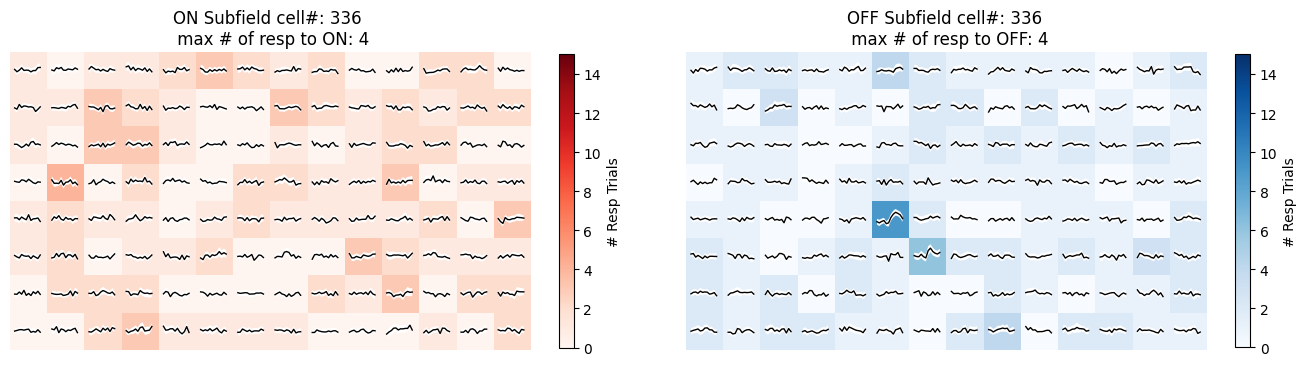

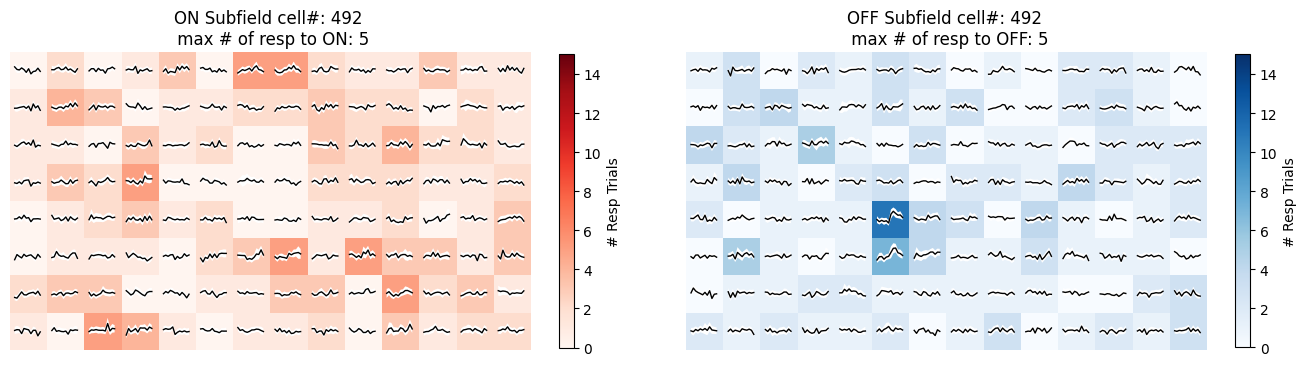

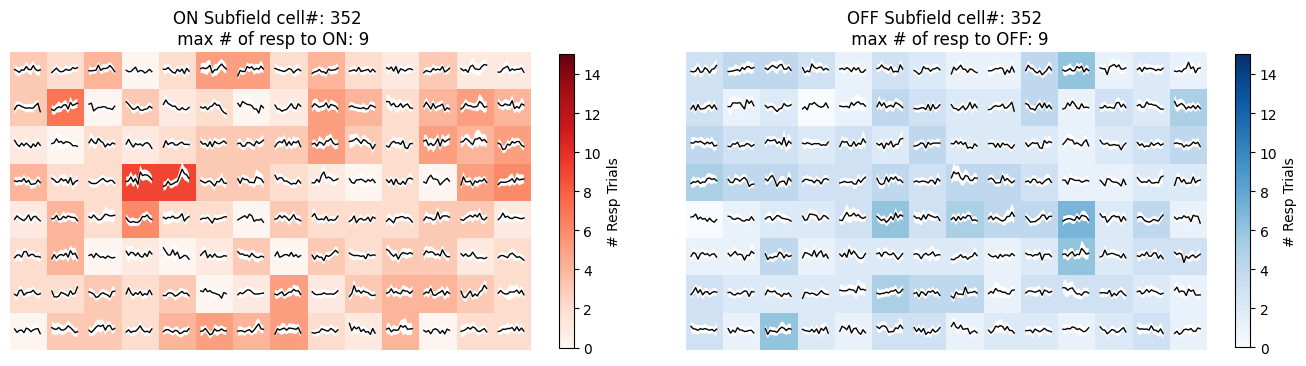

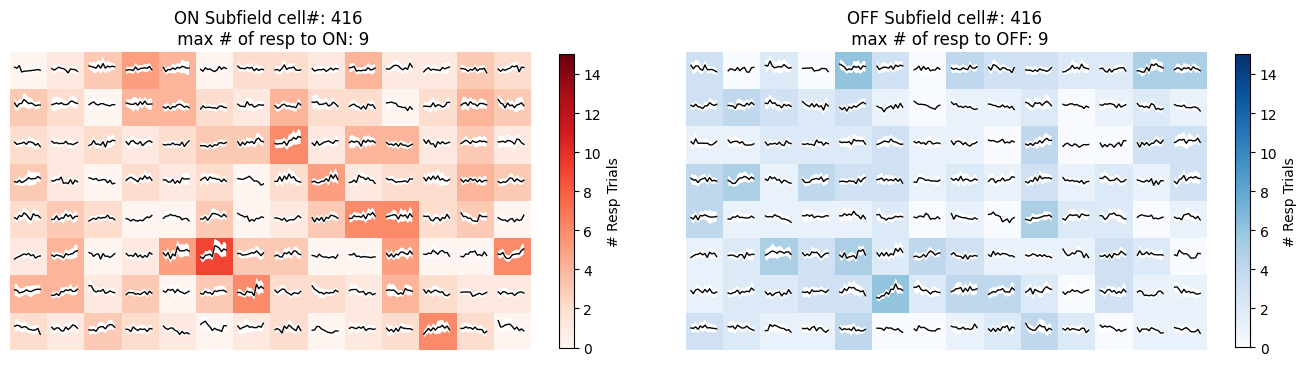

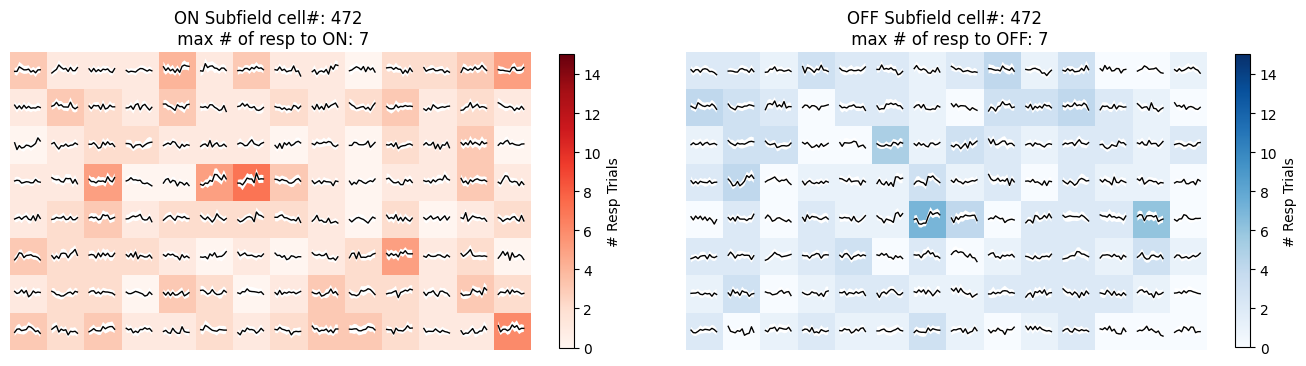

In [36]:
for valid_cell_index in [336, 492, 352, 416, 472]:
    plot_on_off_subfields(responsive_rois, valid_cell_index)

In [10]:
cell_info = pd.read_csv(ARTIFACT_DIR / "all_metrics_240503.csv")

In [13]:
colors = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#F1C40F',  # Yellow
    '#9B59B6',  # Purple
    'cyan',     # Cyan, named color
    'magenta',  # Magenta, named color
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#581845',  # Dark Purple
    '#34495E',  # Asphalt
    '#16A085',  # Green Sea
    '#E74C3C',  # Red Orange
    '#2980B9',  # Belize Hole Blue
    'chocolate' # Chocolate, named color
]

mouse_colors = {'slc2': 'red', 'slc4': 'blue', 'slc5': 'orange', 'teto1': 'green'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[650, 675, 700, 725], [575, 600, 625], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]


In [14]:
stimuli = [
    'frac_res_to_on',
    'frac_res_to_off',
    'frac_resp_full',
    'frac_resp_windowed',
    'frac_resp_natural_images',
    'frac_resp_natural_images_12',
    'frac_resp_natural_movie'
]

In [15]:
def perform_anova(filtered_data):

    f_value, p_value = stats.f_oneway(*filtered_data)
    return f_value, p_value

def perform_tukeys_hsd_and_top_pairs(filtered_data):

    # Combining all groups into a single dataset
    all_data = np.concatenate(filtered_data)

    # Creating group labels accounting for different sizes
    groups = np.concatenate([np.full(len(sublist), i) for i, sublist in enumerate(filtered_data)])

    # Perform Tukey's HSD test
    tukey_result = multi.pairwise_tukeyhsd(all_data, groups, 0.05)

    # Convert Tukey's result to a DataFrame for easier processing
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

    # Filter for significant differences
    significant_pairs = tukey_df[tukey_df['p-adj'] < 0.05]

    # Sort by p-adj and take top 3 significant differences
    significant_pairs_sorted = significant_pairs.sort_values(by='p-adj')


    print("\nTukey's HSD test result:")
    print(tukey_result)
    print(f"\nPairs with p-values < 0.05: {len(significant_pairs_sorted)} found")
    print(significant_pairs_sorted)
    
    return tukey_result, significant_pairs_sorted.to_records(index=False)

### Checking the unusually small %s for teto 1 and slc2

In [22]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups, n_mice))

for subplot_idx in range(1):   
    for m, mouse_id in enumerate(mice):
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group)) & (cell_info['mouse_id']==mice[m])
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:  # subplot_idx == 3
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data[subplot_idx, b, z, m] = len(stim_plane_df) * 100 / len(sample_plane_df)
                if np.mean(bootstrapped_data[subplot_idx, :, z, m]) < 20:
                    print(f"z={z_group} mouse {mouse_id} %= {np.mean(bootstrapped_data[subplot_idx, :, z, m])} n = {len(plane_df)}")

z=[98, 114, 130] mouse slc4 %= 19.122 n = 2273
z=[194, 210, 226] mouse teto1 %= 18.36 n = 2434
z=[146, 162, 178] mouse teto1 %= 11.956 n = 2137
z=[98, 114, 130] mouse teto1 %= 16.196 n = 1458


In [23]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups, n_mice))

            
fig = plt.figure(figsize=(21, 7))

fontsize = 14
total_samples_per_group = [0] * len(z_groups_high_to_low)

titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]

for subplot_idx in range(n_stimulus_pairs):   
    for m, mouse_id in enumerate(mice):
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group)) & (cell_info['mouse_id']==mice[m])
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:  # subplot_idx == 3
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data[subplot_idx, b, z, m] = len(stim_plane_df) * 100 / len(sample_plane_df)

<Figure size 2100x700 with 0 Axes>

/tmp/ipykernel_2399014/211515876.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]


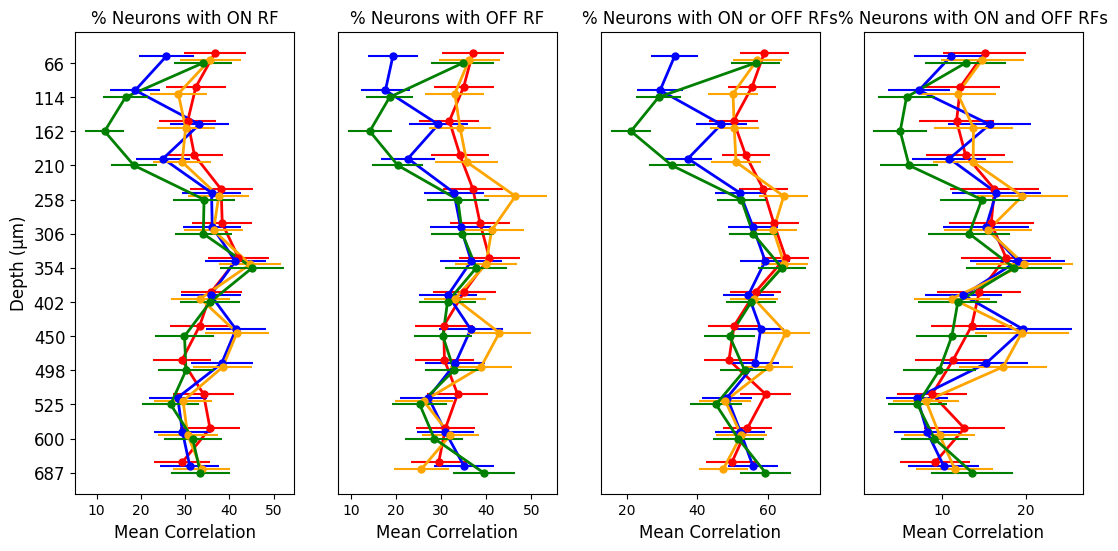

In [ ]:
n_stimulus_pairs=4
jitter_amount = 0.15  # Set the amount of jitter. Adjust as needed for your data.
num_elements = len(mice)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_z_groups, 1))

fig = plt.figure(figsize=(13, 6))
for s in range(n_stimulus_pairs):
    ax = plt.subplot(1, n_stimulus_pairs, s + 1)
    
    for m, mouse_id in enumerate(mice):

        means = []
        std_errors = []
        mouse_color = mouse_colors[mice[m]]
        
        for z in range(n_z_groups):
            # Calculate the mean and standard deviation for each z_group's bootstrap data
            bootstrapped_values = bootstrapped_data[s, :, z, m]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)
        
        # Plot means with standard deviation error bars
        base_y_positions = np.arange(1, len(means) + 1)
        jitter = fixed_jitters[:, 3-m]  # Select the jitter for this mouse across all z_groups
        y_positions = base_y_positions + jitter
        
        plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=5)
        plt.plot(means, y_positions, color=mouse_color, linewidth=2)  # Connecting line

        plt.xlabel('Mean Correlation', fontsize=12)
        plt.title(titles[s])
        # plt.xlim([0, 100])
    
    if s == 0:
        y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]
        plt.yticks(y_positions, y_tick_labels, fontsize=12)
        plt.ylabel("Depth (µm)", fontsize=12)
    else:
        plt.yticks([])

# plt.show()
# fig.savefig(f"percent neurons_jitter.eps", format='eps')


In [ ]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data_all_mice = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups))

            
fig = plt.figure(figsize=(21, 7))

fontsize = 14
total_samples_per_group = [0] * len(z_groups_high_to_low)

titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]

for subplot_idx in range(n_stimulus_pairs):   
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group))
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:  # subplot_idx == 3
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data_all_mice[subplot_idx, b, z] = len(stim_plane_df) * 100 / len(sample_plane_df)

<Figure size 2100x700 with 0 Axes>

In [ ]:
bootstrapped_data_all_mice.shape

(4, 1000, 13)

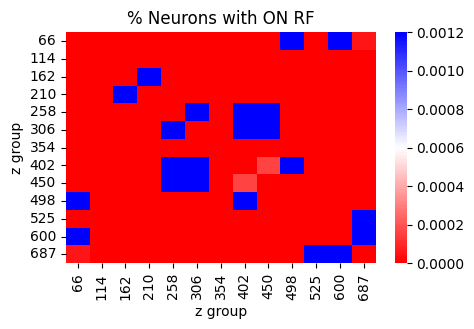

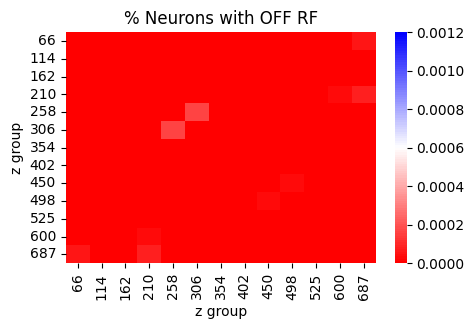

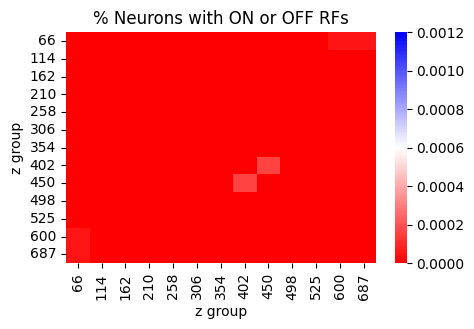

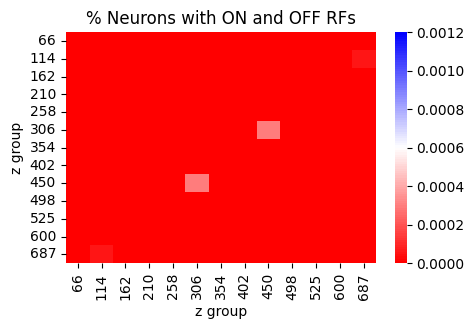

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
colors = ["red", "white", "blue"]  # Red to White to Blue
n_bins = 100  # Number of bins in the colormap
cmap_name = "custom_colormap"

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
p_val = 0.0006#0.05/78
vmin, vmax = 0, p_val*2 # example bounds, adjust as per actual range of your data
norm = plt.Normalize(vmin=vmin, vmax=vmax)


p_value_matrix = np.ones((13, 13))  # Initialize with ones or another appropriate default value
titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]
y_tick_labels = np.flip(y_tick_labels)

for s in range(4):

    data_to_plot = [bootstrapped_data_all_mice[s, :, z] for z in range(n_z_groups)]
    significant_pairs = []

    # Pairwise Kolmogorov-Smirnov tests
    for i in range(len(data_to_plot)):
        for j in range(i+1, len(data_to_plot)):
            ks_stat, p_value = ks_2samp(data_to_plot[i], data_to_plot[j])

            if p_value < p_val:
                significant_pairs.append((i, j, p_value))
                p_value_matrix[j, i] = p_value  # Since it's symmetric
                p_value_matrix[i, j] = p_value  # Since it's symmetric

    # Set the diagonal to a specific value or adjust as needed
    np.fill_diagonal(p_value_matrix, 0)
    # print(len(significant_pairs), significant_pairs)
    plt.figure(figsize=(5, 3))
    
    p_value_matrix = np.flip(np.flip(p_value_matrix, axis=0), axis=1)

    sns.heatmap(p_value_matrix, annot=False, cmap=cm, norm = norm, cbar=True,
                 xticklabels=y_tick_labels, yticklabels=y_tick_labels)

    plt.title(titles[s])
    plt.xlabel('z group')
    plt.ylabel('z group')
    plt.show()

### Find unique RF shapes

In [20]:
def flood_fill(c, r, mat, visited, threshold):
    """
    Perform flood fill algorithm to find contiguous area of interest.

    Args:
        c (int): Current column index.
        r (int): Current row index.
        mat (np.ndarray): The matrix to fill.
        visited (np.ndarray): Matrix to track visited positions.
        threshold (float): The value above which pixels are considered part of the island.

    Returns:
        None: Modifies `visited` in place.
    """
    rows, cols = mat.shape
    # Ensure indices are within bounds and pixel is not yet visited and meets the threshold criterion
    if r < 0 or r >= rows or c < 0 or c >= cols or visited[r, c] or mat[r, c] <= threshold:
        return

    visited[r, c] = True  # Mark current pixel as visited

    # Recursively apply to all neighboring cells (8-directional)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
    for dr, dc in directions:
        flood_fill(c + dc, r + dr, mat, visited, threshold)

def find_rf_center_v3(weighted_avg_events, threshold):
    """
    Find the receptive field (RF) center based on the maximum value and identifies an island of contiguous pixels.
    
    Args:
        weighted_avg_events (np.ndarray): The weighted average events matrix.

    Returns:
        Tuple containing the RF center coordinates and a binary matrix indicating the island around the RF center.
    """
    # Assume this function returns a z-score matrix; here we use weighted_avg_events directly
    z_score_mat, has_rf_zscore = rf_z_test(weighted_avg_events)
    max_zscore_pixel = np.where(z_score_mat == z_score_mat.max())
    rf_center_x, rf_center_y = max_zscore_pixel[0][0], max_zscore_pixel[1][0]
    visited = np.zeros_like(z_score_mat, dtype=bool)

    # Start flood fill from the maximum z-score center
    flood_fill(rf_center_y, rf_center_x, z_score_mat, visited, threshold)

    # Convert visited matrix to binary format
    gauss_input = visited.astype(int)

    return rf_center_x, rf_center_y, gauss_input

def translate_shape_to_top_left(arr):
    """Translate the shape to the top-left corner of the array."""
    rows, cols = np.where(arr == 1)
    if len(rows) == 0:
        return arr
    min_row, min_col = np.min(rows), np.min(cols)
    translated = np.zeros_like(arr)
    for row, col in zip(rows, cols):
        translated[row - min_row, col - min_col] = 1
    return translated

def shape_to_tuple(arr):
    """Convert the array shape to a tuple to be stored in a set."""
    return tuple(map(tuple, arr))

def find_unique_shapes(arrays):
    """Find unique shapes in a list of arrays."""
    unique_shapes = set()
    for arr in arrays:
        translated = translate_shape_to_top_left(arr)
        shape_tuple = shape_to_tuple(translated)
        unique_shapes.add(shape_tuple)
    return unique_shapes

def tuple_to_array(shape_tuple, original_shape=(8, 14)):
    # Convert the shape_tuple into a numpy array and then reshape it to the original_shape
    shape_array = np.array(shape_tuple).reshape(original_shape)
    return shape_array

def perform_anova(filtered_data):
    """
    Perform a one-way ANOVA test on the given data.

    Args:
    filtered_data (list of lists): A list of 14 lists, each containing 4 samples.

    Returns:
    tuple: F-value and P-value of the ANOVA test.
    """
    f_value, p_value = stats.f_oneway(*filtered_data)
    return f_value, p_value

def perform_tukeys_hsd_and_top_pairs(filtered_data):
    """
    Perform Tukey's HSD test on the given data with unequal sample sizes and print the top 5 pairs with
    the most significant differences.

    Args:
    filtered_data (list of lists): A list of lists, each containing a different number of samples.

    Returns:
    statsmodels object: Results of Tukey's HSD test.
    """
    # Combining all groups into a single dataset
    all_data = np.concatenate(filtered_data)

    # Creating group labels accounting for different sizes
    groups = np.concatenate([np.full(len(sublist), i) for i, sublist in enumerate(filtered_data)])

    # Perform Tukey's HSD test
    tukey_result = multi.pairwise_tukeyhsd(all_data, groups, 0.05)

    # Convert Tukey's result to a DataFrame for easier processing
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

    # Filter for significant differences
    significant_pairs = tukey_df[tukey_df['p-adj'] < 0.05]

    # Sort by p-adj and take top 3 significant differences
    # top_pairs = sorted(tukey_result.summary().data[1:], key=lambda x: x[3])[:5]  # Assuming p-value is at index 5
    significant_pairs_sorted = significant_pairs.sort_values(by='p-adj')


    print("\nTukey's HSD test result:")
    print(tukey_result)
    # print("\nTop 5 pairs with the most significant differences:")
    # print(top_pairs)
    print(f"\nPairs with p-values < 0.05: {len(significant_pairs_sorted)} found")
    print(significant_pairs_sorted)
    
    # return tukey_result, [(int(pair[0]), int(pair[1]), pair[3]) for pair in top_pairs]
    return tukey_result, significant_pairs_sorted.to_records(index=False)

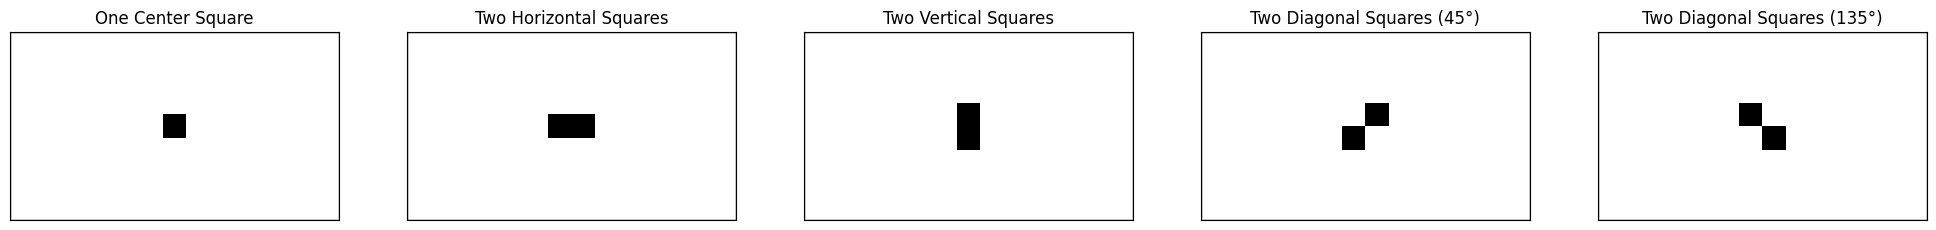

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the size of the rectangles and squares
rect_width, rect_height = 14, 8
square_size = 1

# Function to create a rectangle with a given configuration of squares
def create_rectangle(squares, title, ax):
    # Create a rectangle
    ax.add_patch(patches.Rectangle((0, 0), rect_width, rect_height, edgecolor='black', facecolor='none'))
    # Add squares based on the configuration passed
    for square in squares:
        ax.add_patch(patches.Rectangle(square, square_size, square_size, facecolor='black'))
    ax.set_xlim([0, rect_width])
    ax.set_ylim([0, rect_height])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

# Set up the figure and axis
fig, axs = plt.subplots(1, 5, figsize=(20, 20*rect_height/(5*rect_width)))

# First rectangle: one square in the center
create_rectangle([((rect_width-square_size)/2, (rect_height-square_size)/2)], 'One Center Square', axs[0])

# Second rectangle: two horizontal squares, connected and centered
create_rectangle([((rect_width-2*square_size)/2, (rect_height-square_size)/2),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-square_size)/2)], 'Two Horizontal Squares', axs[1])

# Third rectangle: two vertical squares, connected and centered
create_rectangle([((rect_width-square_size)/2, (rect_height-2*square_size)/2),
                  ((rect_width-square_size)/2, (rect_height-2*square_size)/2 + square_size)], 'Two Vertical Squares', axs[2])

# Fourth rectangle: two diagonal squares, connected and centered, 45-degree angle
create_rectangle([((rect_width-2*square_size)/2, (rect_height-2*square_size)/2),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-2*square_size)/2 + square_size)], 'Two Diagonal Squares (45°)', axs[3])

# Fifth rectangle: two diagonal squares, connected and centered, 135-degree angle
create_rectangle([((rect_width-2*square_size)/2, (rect_height-2*square_size)/2 + square_size),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-2*square_size)/2)], 'Two Diagonal Squares (135°)', axs[4])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plot
plt.show()


In [24]:
from collections import defaultdict
chase_h5_dir = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/v1dd_stimulus_analyses/stimulus_analyses_v2.h5")

def find_unique_rf_shapes(rf_type, threshold):
    total_cells_count = 0
    cells_with_on_rf_count = 0

    n_rf_pixels = []
    unique_gauss_inputs = set()

    unique_shapes_1_pix = defaultdict(int)
    unique_shapes_2_pix = defaultdict(int)
    unique_shapes_3_pix = defaultdict(int)
    unique_shapes_4_pix = defaultdict(int)

    for mouse_num in range(len(mouse_ids)):
        mouse_id = mouse_ids[mouse_num]
        with h5py.File(H5_DIR, 'r') as h5: 
            col_vols = h5[mouse_id].keys()
            for col_vol_str in col_vols:
                     
                if col_vol_str[0] != "1":
                    col_vol_info = h5[mouse_id][col_vol_str]
                    session_name = f"{mouse_id}_{col_vol_str}"
                    session = client.load_ophys_session(session_name)
                    n_planes = len(session.get_planes())
                
                    for plane_id in range(n_planes):
                        col_vol_info = h5[mouse_id][col_vol_str]
                        plane_name = f"Plane_{plane_id}"
                        
                        if plane_name in col_vol_info:
                            
                            plane_info_events = f_events[mouse_id][col_vol_str][plane_name]

                            if rf_type == "on":
                                has_rf = plane_info_events['has_rf_v2_on']
                                rf_input = plane_info_events['weighted_avg_on']
                            else:
                                has_rf = plane_info_events['has_rf_v2_off']
                                rf_input = plane_info_events['weighted_avg_off']      
                                                         
                            with h5py.File(chase_h5_dir, 'r') as f:
                                if f"{mouse_id}/{col_vol_str}/{plane_name}" in f:  
                                    is_ignored_duplicate_dataset = f[mouse_id][col_vol_str][f"{plane_name}"]["is_ignored_duplicate"]
                                    not_duplicate = ~is_ignored_duplicate_dataset[()]  # Correctly fetch the dataset values and invert them
                                    is_roi_valid = f[mouse_id][col_vol_str][f"{plane_name}"]["is_roi_valid"][()]
                                    valid_indices = np.where(is_roi_valid)[0]
                                    valid_not_duplicate_all = not_duplicate[valid_indices]

                            n_cells = rf_input.shape[0]
                            
                            for cell in range(n_cells): 
                                if valid_not_duplicate_all[cell]:
                                    
                                    total_cells_count += 1  # Increment total cells count

                                    if has_rf[cell]:

                                        cells_with_on_rf_count += 1  # Increment count for cells with on receptive field

                                        x_initial, y_initial, gauss_input = find_rf_center_v3(rf_input[cell, :], threshold)

                                        n_rf_pixels.append(gauss_input.sum())
                                        
                                        if gauss_input.sum() == 4:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_4_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 3:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_3_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 2:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_2_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 1:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_1_pix[shape_tuple] += 1
    
    return unique_shapes_1_pix, unique_shapes_2_pix, unique_shapes_3_pix, unique_shapes_4_pix

In [25]:
# took about 6-7 min
unique_shapes_1_pix_on, unique_shapes_2_pix_on, unique_shapes_3_pix_on, unique_shapes_4_pix_on = find_unique_rf_shapes(rf_type = "on", threshold = 2.5)
unique_shapes_1_pix_off, unique_shapes_2_pix_off, unique_shapes_3_pix_off, unique_shapes_4_pix_off = find_unique_rf_shapes(rf_type = "off", threshold = 2.5)

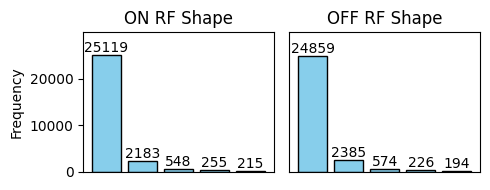

In [31]:
combined_shapes_on = {**unique_shapes_1_pix_on, **unique_shapes_2_pix_on, **unique_shapes_3_pix_on, **unique_shapes_4_pix_on}
combined_shapes_off = {**unique_shapes_1_pix_off, **unique_shapes_2_pix_off, **unique_shapes_3_pix_off, **unique_shapes_4_pix_off}

df_shapes_on = pd.DataFrame(list(combined_shapes_on.items()), columns=['Shape', 'Frequency'])
df_shapes_off = pd.DataFrame(list(combined_shapes_off.items()), columns=['Shape', 'Frequency'])

# Sort the DataFrames
df_shapes_on = df_shapes_on.sort_values('Frequency', ascending=False)
df_shapes_off = df_shapes_off.sort_values('Frequency', ascending=False)
sorted_combined_shapes_on = {shape: combined_shapes_on[shape] for shape in df_shapes_on['Shape']}
sorted_combined_shapes_off = {shape: combined_shapes_off[shape] for shape in df_shapes_off['Shape']}

# Setup for prettier plots
plt.figure(figsize=(5, 2))  # Adjust overall figure size to give plots more room

# ON RF Shape plot
plt.subplot(1, 2, 1)
bars_on = plt.bar(df_shapes_on['Shape'].astype(str).head(5), df_shapes_on['Frequency'].head(5), color='skyblue', edgecolor='black')
plt.ylabel('Frequency', fontsize=10)
plt.title('ON RF Shape', fontsize=12)
plt.xticks([])  # Rotate labels to prevent overlap
plt.yticks(np.arange(0, 26000, 10000), fontsize=10)
plt.ylim([0, 30000])

# Adding frequency labels on top of each bar
for bar in bars_on:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

# OFF RF Shape plot
plt.subplot(1, 2, 2)
bars_off = plt.bar(df_shapes_off['Shape'].astype(str).head(5), df_shapes_off['Frequency'].head(5), color='skyblue', edgecolor='black')
# plt.ylabel('Frequency', fontsize=14)
plt.title('OFF RF Shape', fontsize=12)
plt.xticks([])  # Adjust for aesthetic reasons
plt.yticks([])
plt.ylim([0, 30000])
# Adding frequency labels on top of each bar
for bar in bars_off:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
# plt.savefig('on_off_rf_shapes.eps')


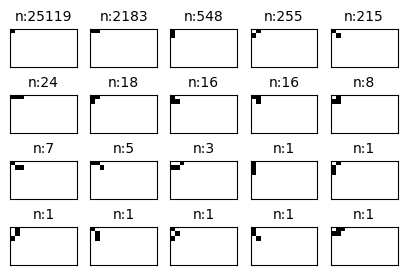

In [32]:
plt.figure(figsize=(5, 5))
for shape_number, (shape_tuple, count) in enumerate(sorted_combined_shapes_on.items(), start=1):
    shape_array = tuple_to_array(shape_tuple)
    shape_array = np.logical_not(shape_array).astype(int)
    plt.subplot(6, 5, shape_number)
    plt.imshow(shape_array, cmap='gray')
    plt.title(f"n:{count}", fontsize=10)
    plt.xticks([])
    plt.yticks([])

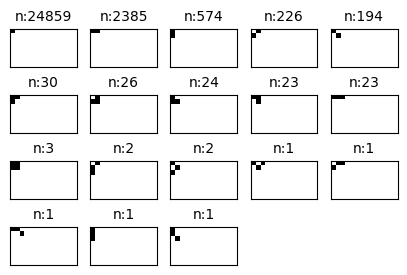

In [33]:
plt.figure(figsize=(5, 5))
for shape_number, (shape_tuple, count) in enumerate(sorted_combined_shapes_off.items(), start=1):
    shape_array = tuple_to_array(shape_tuple)
    shape_array = np.logical_not(shape_array).astype(int)
    plt.subplot(6, 5, shape_number)
    plt.imshow(shape_array, cmap='gray')
    plt.title(f"n:{count}", fontsize=10)
    plt.xticks([])
    plt.yticks([])

In [34]:
data = [(f"Shape {i+1}", count, 1) for i, (shape, count) in enumerate(unique_shapes_1_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)}", count, 2) for i, (shape, count) in enumerate(unique_shapes_2_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)+len(unique_shapes_2_pix_on)}", count, 3) for i, (shape, count) in enumerate(unique_shapes_3_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)+len(unique_shapes_2_pix_on)+len(unique_shapes_3_pix_on)}", count, 4) for i, (shape, count) in enumerate(unique_shapes_4_pix_on.items())]
df_shapes = pd.DataFrame(data, columns=['Shape Number', 'Occurrences', 'Pixel Count'])
df_shapes_sorted = df_shapes.sort_values(by=['Pixel Count', 'Occurrences'], ascending=[True, False])
print(df_shapes_sorted)

   Shape Number  Occurrences  Pixel Count
0       Shape 1        25119            1
2       Shape 3         2183            2
4       Shape 5          548            2
3       Shape 4          255            2
1       Shape 2          215            2
5       Shape 6           24            3
7       Shape 8           18            3
8       Shape 9           16            3
10     Shape 11           16            3
6       Shape 7            8            3
12     Shape 13            7            3
9      Shape 10            5            3
13     Shape 14            3            3
11     Shape 12            1            3
14     Shape 15            1            3
15     Shape 16            1            3
16     Shape 17            1            3
17     Shape 18            1            3
18     Shape 19            1            3
19     Shape 20            1            4


In [35]:
data = [(f"Shape {i+1}", count, 1) for i, (shape, count) in enumerate(unique_shapes_1_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)}", count, 2) for i, (shape, count) in enumerate(unique_shapes_2_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)+len(unique_shapes_2_pix_off)}", count, 3) for i, (shape, count) in enumerate(unique_shapes_3_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)+len(unique_shapes_2_pix_off)+len(unique_shapes_3_pix_off)}", count, 4) for i, (shape, count) in enumerate(unique_shapes_4_pix_off.items())]
df_shapes = pd.DataFrame(data, columns=['Shape Number', 'Occurrences', 'Pixel Count'])
df_shapes_sorted = df_shapes.sort_values(by=['Pixel Count', 'Occurrences'], ascending=[True, False])
print(df_shapes_sorted)

   Shape Number  Occurrences  Pixel Count
0       Shape 1        24859            1
3       Shape 4         2385            2
4       Shape 5          574            2
2       Shape 3          226            2
1       Shape 2          194            2
10     Shape 11           30            3
6       Shape 7           26            3
7       Shape 8           24            3
8       Shape 9           23            3
11     Shape 12           23            3
5       Shape 6            2            3
9      Shape 10            2            3
12     Shape 13            1            3
13     Shape 14            1            3
14     Shape 15            1            3
15     Shape 16            1            3
16     Shape 17            1            3
17     Shape 18            3            4


### ON-OFF center distance

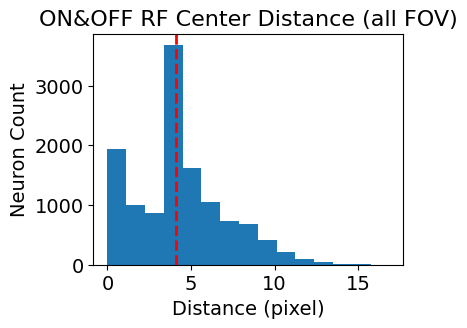

In [12]:
both_on_off = cell_info[(cell_info['has_rf_v2_off']==True) & (cell_info['has_rf_v2_on']==True)]

distance = np.sqrt((both_on_off['on_center_x'] - both_on_off['off_center_x'])**2
    + (both_on_off['on_center_y'] - both_on_off['off_center_y'])**2) 

plt.figure(figsize=(4,3))
plt.hist(distance, bins=15)
plt.axvline(np.median(distance), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Distance (pixel)", fontsize=14)
plt.ylabel("Neuron Count", fontsize=14)
plt.yticks(np.arange(0, 4000, 1000), fontsize=14)
plt.xticks(fontsize=14)
plt.title("ON&OFF RF Center Distance (all FOV)", fontsize=16)
plt.savefig('on_off_center_distance.eps', format='eps')

### Per mouse ON-OFF center distance

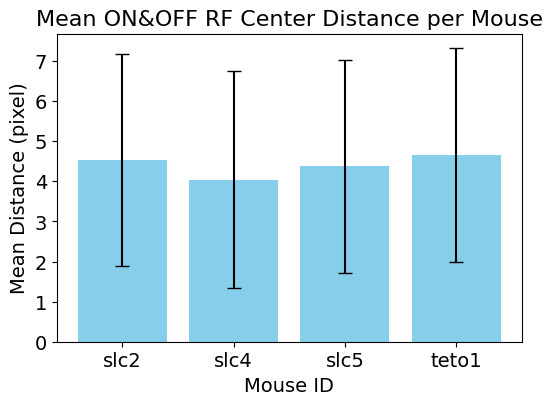

In [39]:

mice = cell_info['mouse_id'].unique()

# Initialize lists to store means and standard deviations
means = []
stds = []

# Loop over each mouse
for mouse in mice:
    # Filter cell_info for current mouse and both_on_off condition
    both_on_off_mouse = cell_info[(cell_info['has_rf_v2_off'] == True) & 
                                  (cell_info['has_rf_v2_on'] == True) & 
                                  (cell_info['mouse_id'] == mouse)]
    
    # Calculate the distance
    distance = np.sqrt((both_on_off_mouse['on_center_x'] - both_on_off_mouse['off_center_x'])**2 + 
                       (both_on_off_mouse['on_center_y'] - both_on_off_mouse['off_center_y'])**2)
    
    # Calculate mean and standard deviation
    mean_distance = distance.mean()
    std_distance = distance.std()
    
    # Append to lists
    means.append(mean_distance)
    stds.append(std_distance)

# Create the bar plot with error bars
plt.figure(figsize=(6,4))
plt.bar(mice, means, yerr=stds, capsize=5, color='skyblue')
plt.xlabel('Mouse ID', fontsize=14)
plt.ylabel('Mean Distance (pixel)', fontsize=14)
plt.title('Mean ON&OFF RF Center Distance per Mouse', fontsize=16)
plt.xticks(mice, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


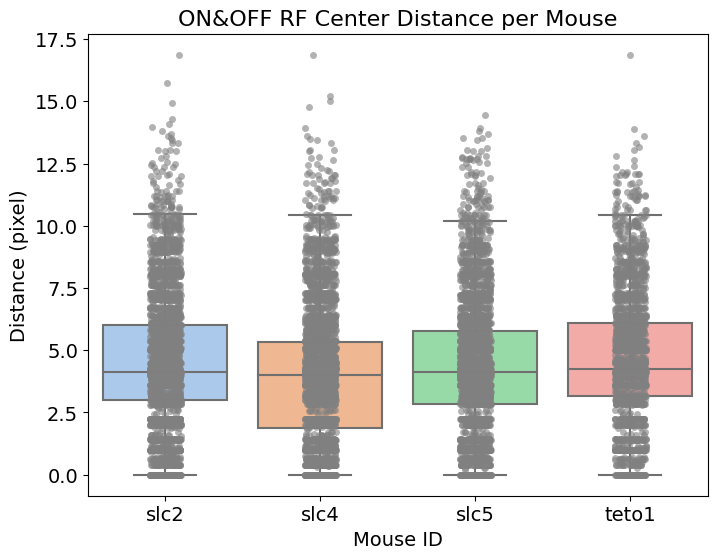

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming cell_info DataFrame is already defined and has the necessary columns.

# List of unique mouse IDs
mice = cell_info['mouse_id'].unique()

# Initialize list to store distances for each mouse
data = []

# Loop over each mouse
for mouse in mice:
    # Filter cell_info for current mouse and both_on_off condition
    both_on_off_mouse = cell_info[(cell_info['has_rf_v2_off'] == True) & 
                                  (cell_info['has_rf_v2_on'] == True) & 
                                  (cell_info['mouse_id'] == mouse)]
    
    # Calculate the distance
    distance = np.sqrt((both_on_off_mouse['on_center_x'] - both_on_off_mouse['off_center_x'])**2 + 
                       (both_on_off_mouse['on_center_y'] - both_on_off_mouse['off_center_y'])**2)
    
    # Append distances with mouse ID to the list
    for d in distance:
        data.append({'mouse_id': mouse, 'distance': d})

# Convert data list to DataFrame
data_df = pd.DataFrame(data)

# Create the box plot with individual data points
plt.figure(figsize=(8,6))
sns.boxplot(x='mouse_id', y='distance', data=data_df, showfliers=False, palette='pastel')
sns.stripplot(x='mouse_id', y='distance', data=data_df, color='gray', alpha=0.6, jitter=True)

plt.xlabel('Mouse ID', fontsize=14)
plt.ylabel('Distance (pixel)', fontsize=14)
plt.title('ON&OFF RF Center Distance per Mouse', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('on_off_center_distance_mice.eps', format='eps')


In [11]:
z_groups = [[482, 498, 514], 
            [434, 450, 466], [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], 
            [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]

n_stimulus_pairs = 1
n_bootstrap = 1000
n_z_groups = len(z_groups)
n_mice = len(mice)
bootstrapped_data2 = np.zeros((n_bootstrap, n_z_groups, n_mice))

for b in range(n_bootstrap):
    for m, mouse_id in enumerate(mice):
        for z, z_group in enumerate(z_groups):

            on_condition = (cell_info['z'].isin(z_group)) & (cell_info['has_rf_v2_on']==True) & (cell_info['mouse_id'] == mice[m])
            off_condition = (cell_info['z'].isin(z_group)) & (cell_info['has_rf_v2_off']==True) & (cell_info['mouse_id'] == mice[m])
            on = cell_info[on_condition].reset_index(drop=True)
            off = cell_info[off_condition].reset_index(drop=True)  

            on_sample_indices = np.random.choice(range(len(on)), size=50, replace=True)
            off_sample_indices = np.random.choice(range(len(off)), size=50, replace=True)

            on_sampled_x = on.loc[on_sample_indices]
            off_sampled_y = off.loc[off_sample_indices]
            distance = np.sqrt((on_sampled_x['on_center_x'].mean() - off_sampled_y['off_center_x'].mean())**2
                + (on_sampled_x['on_center_y'].mean() - off_sampled_y['off_center_y'].mean())**2)

            bootstrapped_data2[b, z, m] = distance

ValueError: 'a' cannot be empty unless no samples are taken

In [2]:
mice = [1, 2, 3, 4]

# Number of z_groups and mice
n_z_groups = 10  # Since you have 10 depth groups
n_mice = 4  # Number of mice

# Calculate the overall mean and std deviation across all depths for each mouse
overall_means = np.mean(bootstrapped_data2, axis=(0, 1))
overall_stds = np.std(bootstrapped_data2, axis=(0, 1))

# Plotting
mouse_colors = {1: 'red', 2: 'blue', 3: 'orange', 4: 'green'}
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the size as necessary
bar_width = 0.5  # Width of each bar

# Creating the bar plot
indices = np.arange(n_mice)  # Position of bars for each mouse

for i, mouse_id in enumerate(mice):
    # Plotting the bars
    ax.bar(indices[i], overall_means[i], width=bar_width, color=mouse_colors[mouse_id],
           yerr=overall_stds[i], capsize=5, label=f'Mouse {mouse_id}')

# Adding labels and title
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Average Distance (pixels)')
ax.set_title('Overall Average ON/OFF Center Distance per Mouse')
ax.set_xticks(indices)
ax.set_xticklabels([f'Mouse {id}' for id in mice])
ax.set_ylim([0, max(overall_means + overall_stds) + 0.5])  # Adjust y-limit to give some space above error bars

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
# fig.savefig(f"on_off_center_pop.eps", format='eps')

NameError: name 'np' is not defined